<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Problem:</font></h3>

In this project, we're diving into a bunch of health data from people with heart issues—things like age, blood pressure, and heart rate. Our main aim is to create a computer program that can predict if someone has heart disease or not. Because it's super important not to miss anyone who might have the disease, we're focusing on making sure the program catches as many potential patients as possible. That's why we're really paying attention to how good it is at finding the people who do have heart problems.

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Objectives:</font></h3>

* __Explore the Dataset__: Uncover patterns, distributions, and relationships within the data.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into bivariate relationships against the target.
* __Preprocessing Steps__:
  - Remove irrelevant features
  - Address missing values
  - Treat outliers
  - Encode categorical variables
  - Transform skewed features to achieve normal-like distributions
* __Model Building__:
  - Establish pipelines for models that require scaling
  - Implement and tune classification models including KNN, SVM, Decision Trees, and Random Forest
  - Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients
* __Evaluate and Compare Model Performance__: Utilize precision, recall, and F1-score to gauge models' effectiveness.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
    - [Step 5.6 | Transforming Skewed Features](#transform)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Model Evaluation](#rf_eval)
* [Step 8 | KNN Model Building](#knn)
    - [Step 8.1 | KNN Base Model Definition](#knn_base)
    - [Step 8.2 | KNN Hyperparameter Tuning](#knn_hp)
    - [Step 8.3 | KNN Model Evaluation](#knn_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 10 | Conclusion](#conclusion)
* [Step 11 | Decile chart visualization](#Decile_chart_visualization)
* [Step 12 | Future scope](#Future_scope)

<a id="import"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

<a id="read"></a>
# <p style="background-color:lightblue ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
# Read Dataset
df = pd.read_csv(r"C:\Users\Kunwa\OneDrive\Desktop\Data Science\Data Science Course Project\Data\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| __ca__ | Number of major vessels (0-4) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

<a id="overview"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:#0000FF'>Step 3.1 |</span><span style='color:blue'> Dataset Basic Information</span></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Check duplicates
df.duplicated().sum()

1

In [ ]:
# Dropping the Duplicate value
df.drop(index = df[df.duplicated()==True].index, axis = 0 , inplace = True)

## Inferences:
* Number of Entries: The dataset consists of `303 entries`, ranging from `index 0 to 302`.
* Columns: There are 14 columns in the dataset corresponding to various attributes of the patients and results of tests.
* Data Types:
    * `13 Columns` in Dataset are of the `integer data type`.
    * Only the `oldpeak column` is of the `Float data type`.
* Missing Values: There don't appear to be any missing values in the dataset as each column has 303 non-null entries.
* Found one Duplicate Row in the Dataset. Dropped the Duplicated Row.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:110%; text-align:left">

__<span style="font-size:130%; color:red"> Note: </span>__ Based on the data types and the feature explanations we had earlier, we can see that __9 columns__ (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are indeed __numerical__ in terms of data type, but __categorical__ in terms of their semantics. These features should be converted to string (__object__) data type for proper analysis and interpretation:

## Converting columns which have Category Data

In [6]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
for features in df.columns:
    if features not in continuous_features:
        df[features] = df[features].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

<a id="num_statistics"></a>
# <b><span style='color:#0000FF'>Step 3.2 |</span><span style='color:blue'> Summary Statistics for Numerical Variables</span></b>

### Get the summary statistics for numerical variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Describing the Data Distribution of Numerical Columns ranging from 1 Percentile to 99 Percentile.

In [8]:
no = df.select_dtypes(include = 'number')

df_summary = pd.DataFrame(columns = ['variables', 'Missing','Missing_Percentage', 'Min', 'p1', 'p5', 'p10' , 'p25', 'p50', 
                                     'Mean', 'p75', 'p90', 'p95', 'p99' , 'Max', 'Sum'])

for i in list(no.columns):
    variable = i
    Missing = df[i].isna().sum()
    Missing_Percentage = Missing/df.shape[0]
    Min = np.min(df[i])
    p1 = np.nanpercentile(df[i], 1)
    p5 = np.nanpercentile(df[i], 5)
    p10 = np.nanpercentile(df[i], 10)
    p25 = np.nanpercentile(df[i], 25)
    p50 = np.nanpercentile(df[i], 50)
    Mean = np.mean(df[i])
    p75 = np.nanpercentile(df[i], 75)
    p90 = np.nanpercentile(df[i], 90)
    p95 = np.nanpercentile(df[i], 95)
    p99 = np.nanpercentile(df[i], 99)
    Max = np.max(df[i])
    Sum = np.sum(df[i])
    dic = dict(zip(df_summary.columns, [variable,Missing, Missing_Percentage, Min, p1, p5, p10, p25, p50, Mean, p75, p90, p95, p99, Max, Sum]))
    df_summary.loc[len(df_summary)]=[variable,Missing, Missing_Percentage, Min, p1, p5, p10, p25, p50, Mean, p75, p90, p95, p99, Max, Sum]

df_summary

,variables,Missing,Missing_Percentage,Min,p1,p5,p10,p25,p50,Mean,p75,p90,p95,p99,Max,Sum
0,age,0,0.0,29.0,35.00,39.1,42.0,47.5,55.0,54.366337,61.0,66.0,68.0,71.00,77.0,16473.0
1,trestbps,0,0.0,94.0,100.00,108.0,110.0,120.0,130.0,131.623762,140.0,152.0,160.0,180.00,200.0,39882.0
2,chol,0,0.0,126.0,149.00,175.0,188.0,211.0,240.0,246.264026,274.5,308.8,326.9,406.74,564.0,74618.0
3,thalach,0,0.0,71.0,95.02,108.1,116.0,133.5,153.0,149.646865,166.0,176.6,181.9,191.96,202.0,45343.0
4,oldpeak,0,0.0,0.0,0.00,0.0,0.0,0.0,0.8,1.039604,1.6,2.8,3.4,4.20,6.2,315.0


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Numerical Features:</font></h3>

* __`Age`__: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.
* __`Trestbps`__: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.
* __`Chol`__: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.
* __`Thalach`__: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.
* __`Oldpeak`__: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

<a id="cat_statistics"></a>
# <b><span style='color:#0000FF'>Step 3.3 |</span><span style='color:blue'> Summary Statistics for Categorical  Variables</span></b>

In [9]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Categorical Features (object data type):</font></h3>

* __`sex`__: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.
* __`cp`__: Four unique types of chest pain are present. The most common type is "__0__", occurring 143 times.
* __`fbs`__: There are two categories, and the most frequent one is "__0__" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.
* __`restecg`__: Three unique results are present. The most common result is "__1__", appearing 152 times.
* __`exang`__: There are two unique values. The most frequent value is "__0__" (indicating no exercise-induced angina), which is observed 204 times.
* __`slope`__: Three unique slopes are present. The most frequent slope type is "__2__", which occurs 142 times.
* __`ca`__: There are five unique values for the number of major vessels colored by fluoroscopy, with "__0__" being the most frequent, occurring 175 times.
* __`thal`__: Four unique results are available. The most common type is "__2__" (indicating a reversible defect), observed 166 times.
* __`target`__: Two unique values indicate the presence or absence of heart disease. The value "__1__" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.

<a id="eda"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:#0000FF'>Step 4.1 |</span><span style='color:blue'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This allows us to understand the central tendency, spread, and shape of the dataset's distribution.

    
* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<a id="num_uni"></a>
### <b><span style='color:#0000FF'>Step 4.1.1 |</span><span style='color:blue'> Numerical Variables Univariate Analysis</span></b>  

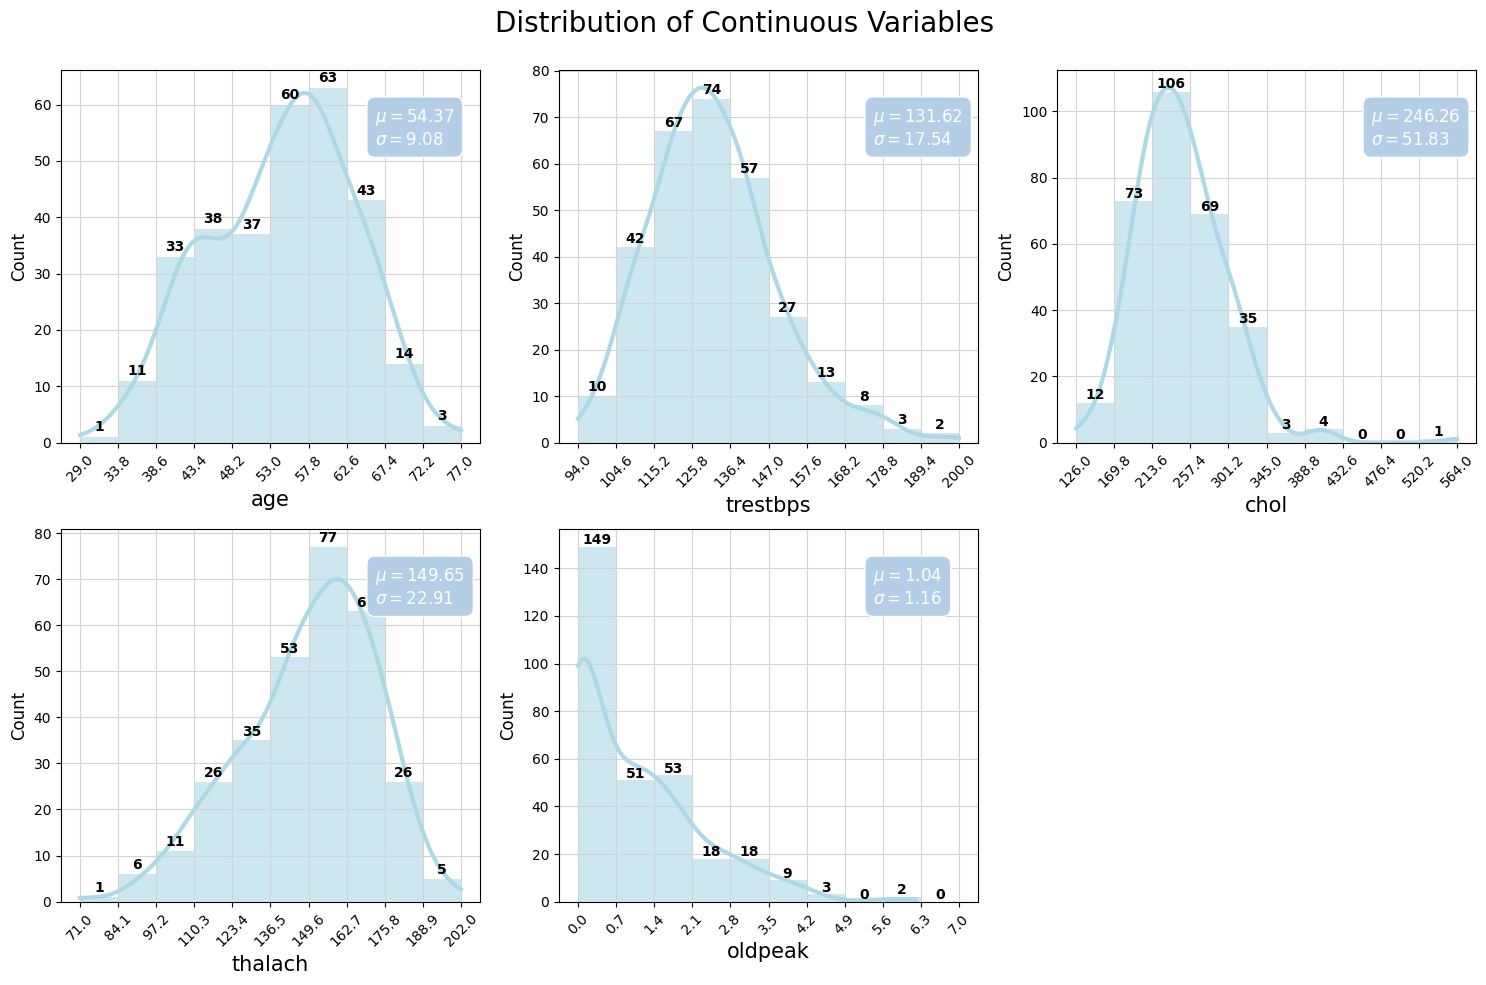

In [10]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='lightblue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#b3cee5', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Age (`age`)__: The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 54.37 years with a standard deviation of 9.08 years.
    
    
* __Resting Blood Pressure (`trestbps`)__: The resting blood pressure for most individuals is concentrated around 120-140 mm Hg, with a mean of approximately 131.62 mm Hg and a standard deviation of 17.54 mm Hg.
    
    
* __Serum Cholesterol (`chol`)__: Most individuals have cholesterol levels between 200 and 300 mg/dl. The mean cholesterol level is around 246.26 mg/dl with a standard deviation of 51.83 mg/dl.
    
    
* __Maximum Heart Rate Achieved (`thalach`)__: The majority of the individuals achieve a heart rate between 140 and 170 bpm during a stress test. The mean heart rate achieved is approximately 149.65 bpm with a standard deviation of 22.91 bpm.
    
    
* __ST Depression Induced by Exercise (`oldpeak`)__: Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise. The mean ST depression value is 1.04 with a standard deviation of 1.16.
    
____

Upon reviewing the histograms of the continuous features and cross-referencing them with the provided feature descriptions, everything appears consistent and within expected ranges. __There doesn't seem to be any noticeable noise or implausible values among the continuous variables.__

<a id="cat_uni"></a>
### <b><span style='color:#0000FF'>Step 4.1.2 |</span><span style='color:blue'> Categorical Variables Univariate Analysis</span></b>  

In [11]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

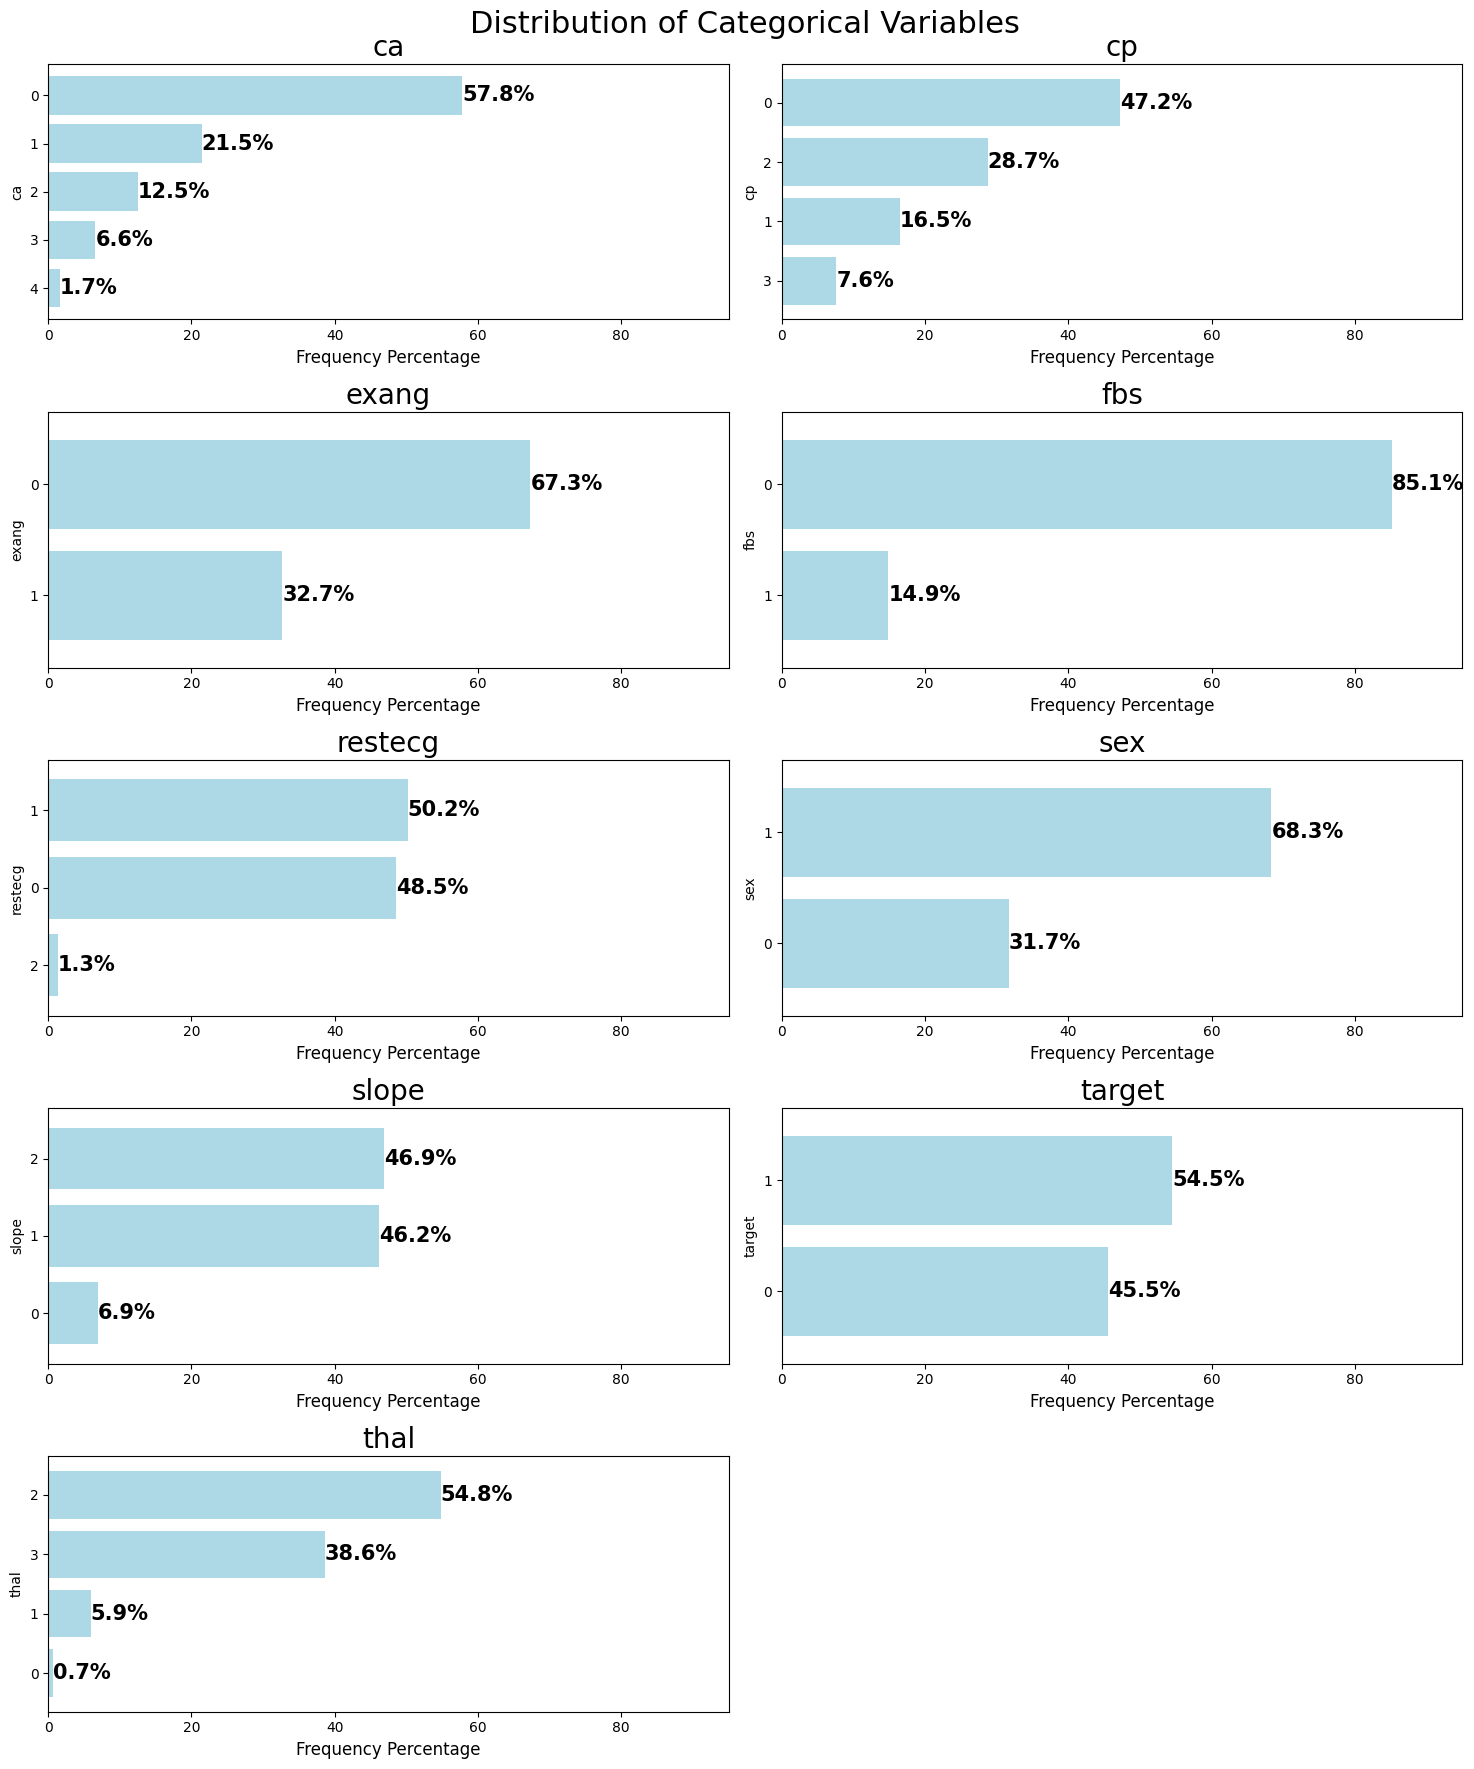

In [12]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='lightblue')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:112%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>
    
* __Gender (`sex`)__: The dataset is predominantly female, constituting a significant majority.

    
* __Type of Chest Pain (`cp`)__: The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

    
* __Fasting Blood Sugar (`fbs`)__: A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

    
* __Resting Electrocardiographic Results (`restecg`)__: The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

    
* __Exercise-Induced Angina (`exang`)__: A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

    
* __Slope of the Peak Exercise ST Segment (`slope`)__: The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

    
* __Number of Major Vessels Colored by Fluoroscopy (`ca`)__: Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

    
* __Thalium Stress Test Result (`thal`)__: The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

    
* __Presence of Heart Disease (`target`)__: The __dataset is nearly balanced__ in terms of heart disease presence, with about 54.5% having it and 45.5% not having it.

<a id="num_target"></a>
### <b><span style='color:#0000FF'>Step 4.2.1 |</span><span style='color:blue'> Numerical Features vs Target</span></b>  

I am going to visualize each continuous feature against the target using two types of charts: 

* __Bar plots__ - showing the mean values.
* __KDE plots__ - displaying the distribution for each target category.

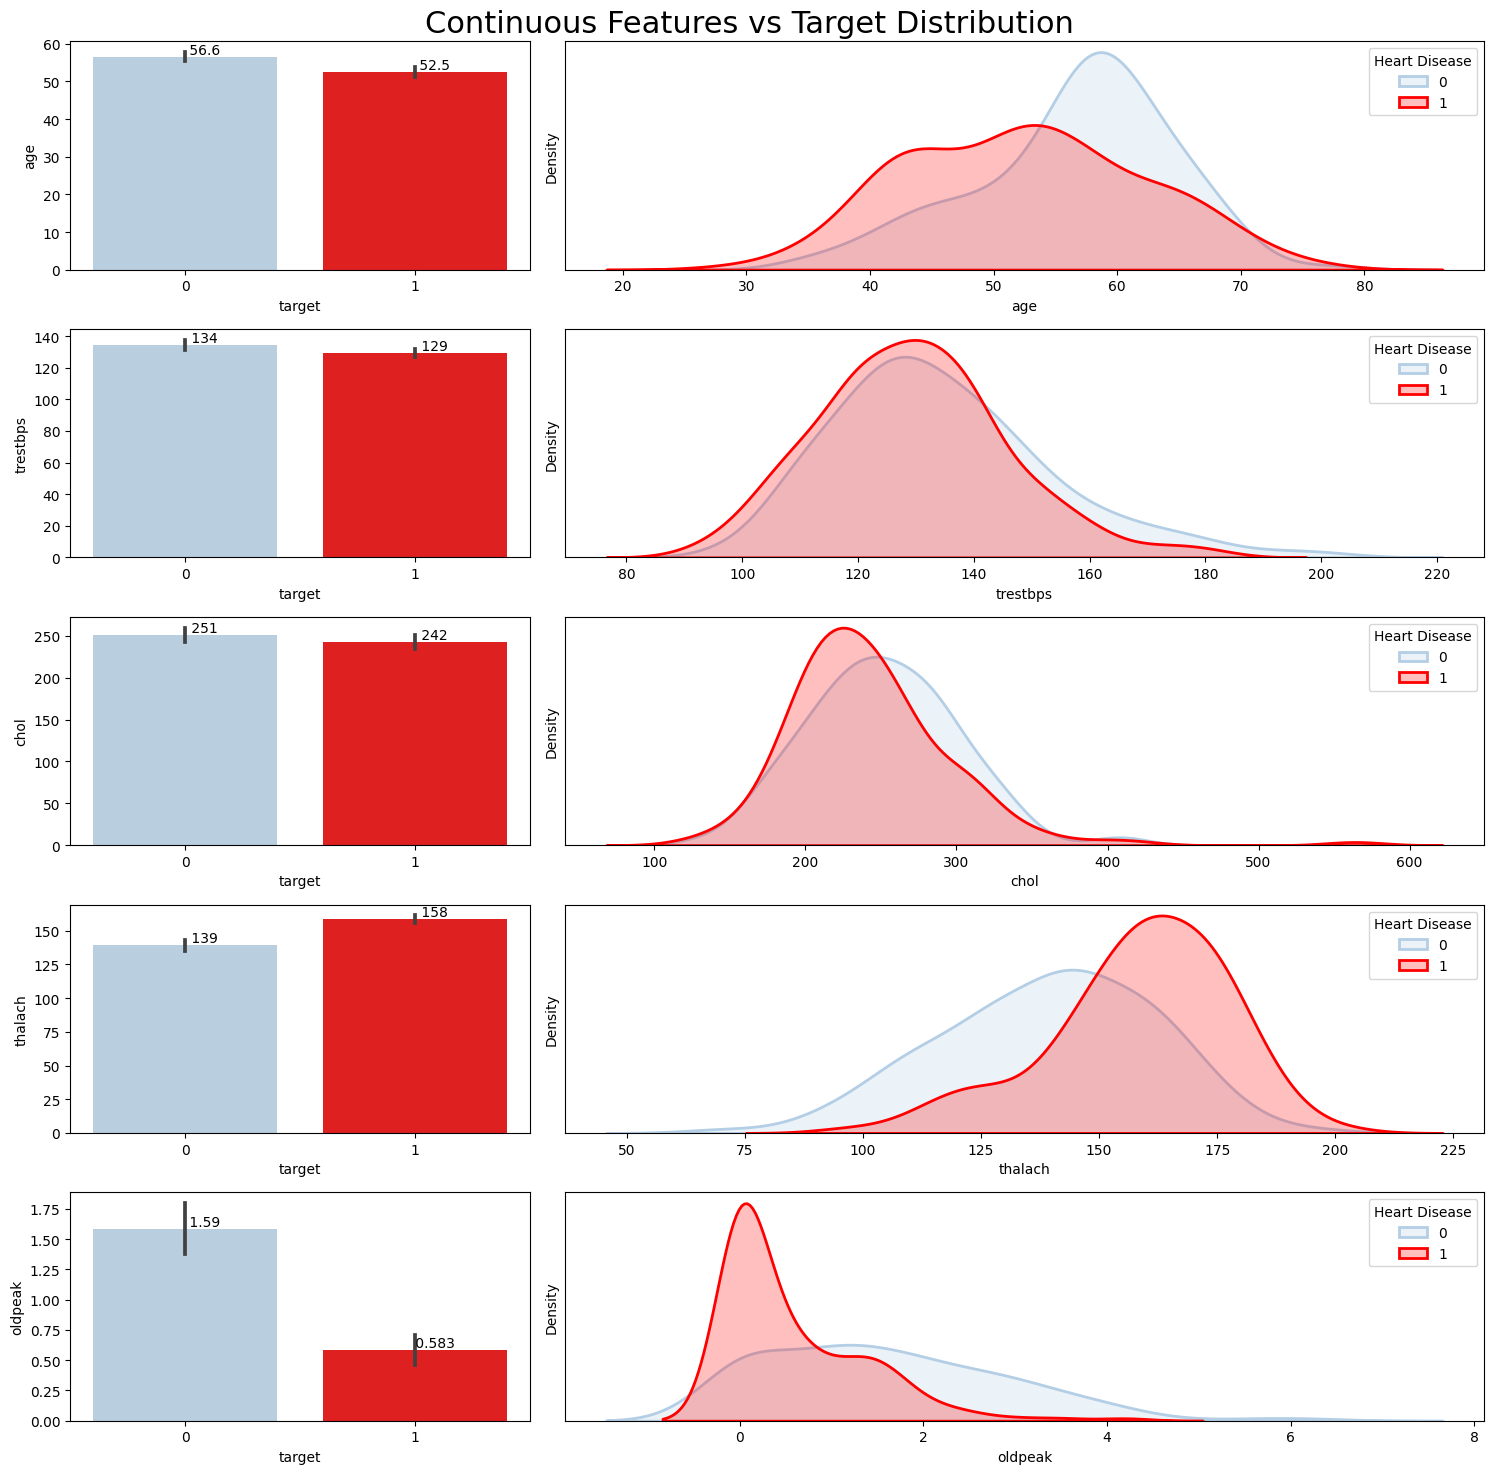

In [13]:
# Set color palette
sns.set_palette(['#b3cee5', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col,fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, color = 'red', fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>
    
* __Age (`age`)__: The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.

    
* __Resting Blood Pressure (`trestbps`)__: Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.

    
* __Serum Cholesterol (`chol`)__: The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.
 
    
* __Maximum Heart Rate Achieved (`thalach`)__: There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.

    
* __ST Depression (`oldpeak`)__: The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.
    
____
    
Based on the visual difference in distributions and mean values, __Maximum Heart Rate (`thalach`)__ seems to have the most impact on the heart disease status, followed by __ST Depression (`oldpeak`)__ and __Age (`age`)__.

<a id="cat_target"></a>
### <b><span style='color:#0000FF'>Step 4.2.2 |</span><span style='color:blue'> Categorical Features vs Target</span></b>  

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

I am going to display __100% stacked bar plots__ for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [14]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

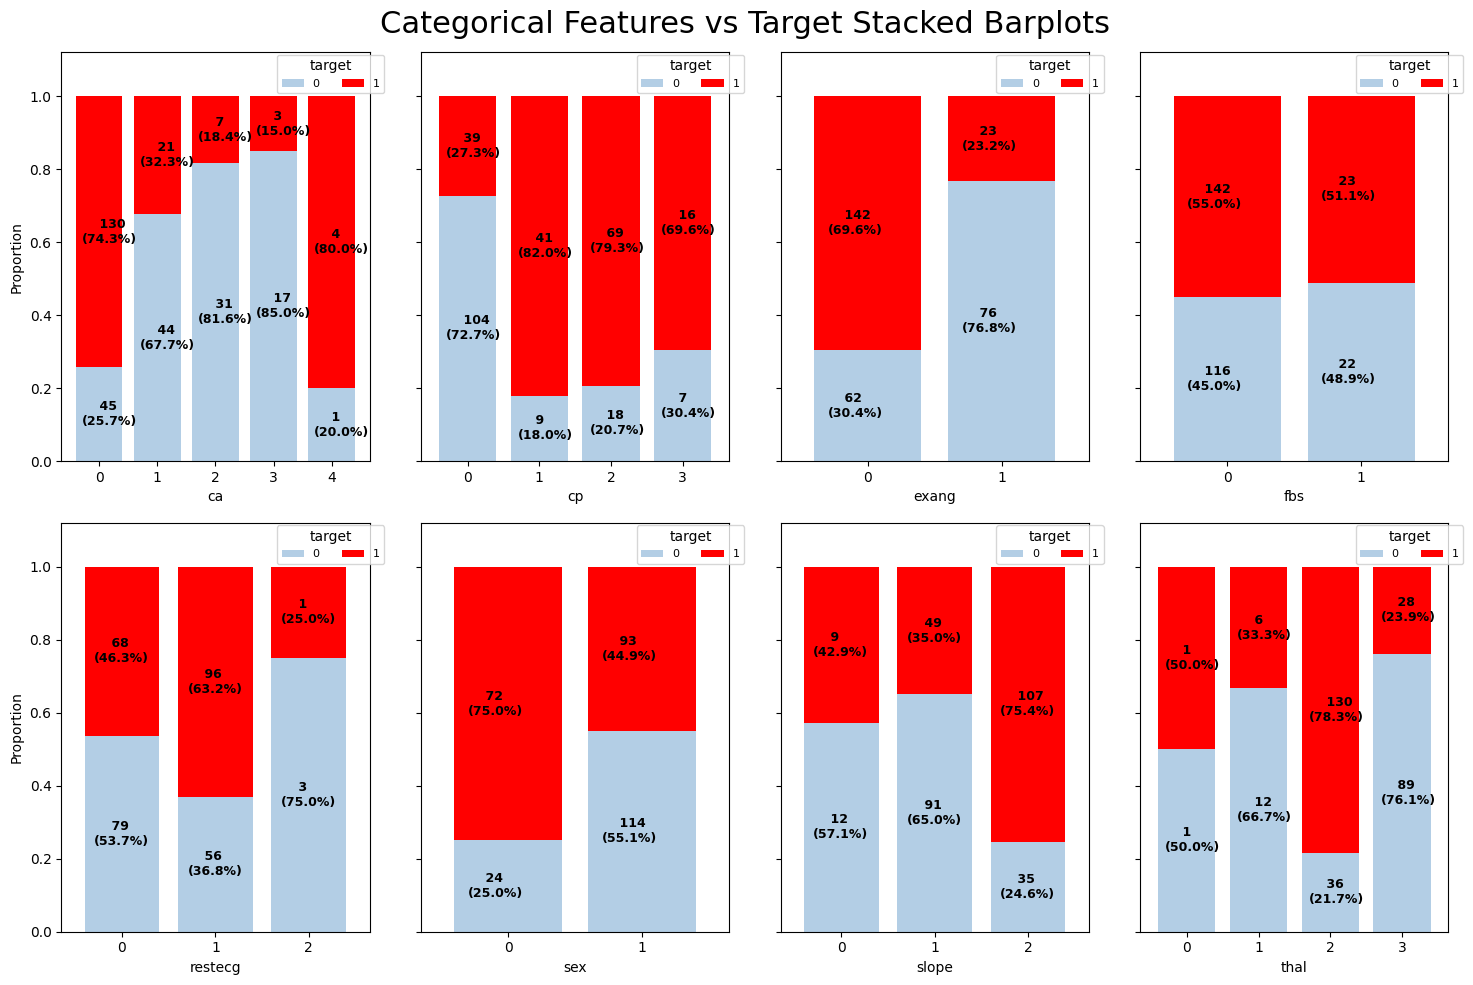

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#b3cee5', 'red'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Major Vessels (`ca`)__: The majority of patients with heart disease have fewer major vessels colored by fluoroscopy. As the number of colored vessels increases, the proportion of patients with heart disease tends to decrease. Especially, patients with 0 vessels colored have a higher proportion of heart disease presence.

    
* __Chest Pain Type (`cp`)__: Different types of chest pain present varied proportions of heart disease. Notably, types 1, 2, and 3 have a higher proportion of heart disease presence compared to type 0. This suggests the type of chest pain can be influential in predicting the disease.

    
* __Exercise Induced Angina (`exang`)__: Patients who did not experience exercise-induced angina (0) show a higher proportion of heart disease presence compared to those who did (1). This feature seems to have a significant impact on the target.

    
* __Fasting Blood Sugar (`fbs`)__: The distribution between those with fasting blood sugar > 120 mg/dl (1) and those without (0) is relatively similar, suggesting `fbs` might have limited impact on heart disease prediction.

    
* __Resting Electrocardiographic Results (`restecg`)__: Type 1 displays a higher proportion of heart disease presence, indicating that this feature might have some influence on the outcome.

    
* __Sex (`sex`)__: Females (1) exhibit a lower proportion of heart disease presence compared to males (0). This indicates gender as an influential factor in predicting heart disease.

    
* __Slope of the Peak Exercise ST Segment (`slope`)__: The slope type 2 has a notably higher proportion of heart disease presence, indicating its potential as a significant predictor.

    
* __Thalium Stress Test Result (`thal`)__: The reversible defect category (2) has a higher proportion of heart disease presence compared to the other categories, emphasizing its importance in prediction.

____

In summary, based on the visual representation:

* __Higher Impact on Target: `ca`, `cp`, `exang`, `sex`, `slope`, and `thal`__
* __Moderate Impact on Target: `restecg`__
* __Lower Impact on Target: `fbs`__

<a id="preprocessing"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#0000FF'>Step 5.1 |</span><span style='color:blue'> Irrelevant Features Removal</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

All features in the dataset appear to be relevant based on our __EDA__. No columns seem redundant or irrelevant. Thus, we'll retain all features, ensuring no valuable information is lost, especially given the dataset's small size.

In [16]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

____
<a id="outlier"></a>
# <b><span style='color:#0000FF'>Step 5.3 |</span><span style='color:blue'> Outlier Treatment</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [17]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [18]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found the following:

* __`trestbps`__: 9 outliers
* __`chol`__: 5 outliers
* __`thalach`__: 1 outlier
* __`oldpeak`__: 5 outliers
* __`age`__: No outliers

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
    
* __K-Nearest Neighbors (KNN)__: KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.
    
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    
    
* __Transformations__: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.
    
    
* __Robust Scaling__: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM and KNN)__ and __the small size of our dataset__, direct removal of outliers might not be the best approach. Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.

____
<a id="encoding"></a>
# <b><span style='color:#0000FF'>Step 5.4 |</span><span style='color:blue'> Categorical Features Encoding</span></b>

In [19]:
df.target = df.target.astype('int')
categorical = df.select_dtypes(include = 'object')
categorical_list = categorical.columns.tolist()
final_df = pd.get_dummies(df, columns = categorical_list, dtype = int)

In [20]:
final_df.dtypes

age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
target         int32
sex_0          int32
sex_1          int32
cp_0           int32
cp_1           int32
cp_2           int32
cp_3           int32
fbs_0          int32
fbs_1          int32
restecg_0      int32
restecg_1      int32
restecg_2      int32
exang_0        int32
exang_1        int32
slope_0        int32
slope_1        int32
slope_2        int32
ca_0           int32
ca_1           int32
ca_2           int32
ca_3           int32
ca_4           int32
thal_0         int32
thal_1         int32
thal_2         int32
thal_3         int32
dtype: object

____
<a id="transform"></a>
# <b><span style='color:#0000FF'>Step 5.6 |</span><span style='color:blue'> Transforming Skewed Features</span></b>

In [21]:
# Define the features (X) and the output labels (y)
X = final_df.drop('target', axis=1)
y = final_df['target'] 

In [22]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<a id="dt"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:#0000FF'>Step 6.1 |</span><span style='color:blue'> DT Base Model Definition</span></b>

In [23]:
%%time
DT = DecisionTreeClassifier
Model_1  = DT( random_state = 42, max_depth = 7)
Model_1.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 7.53 ms


DecisionTreeClassifier(max_depth=7, random_state=42)

____
<a id="dt_eval"></a>
# <b><span style='color:#0000FF'>Step 6.2 |</span><span style='color:blue'> DT Model Evaluation</span></b>

In [24]:
print('AUC Score: Train', roc_auc_score(y_train, Model_1.predict_proba(X_train)[:,1]))
print('AUC Score: test', roc_auc_score(y_test, Model_1.predict_proba(X_test)[:,1]))

AUC Score: Train 0.9993457300275482
AUC Score: test 0.7689393939393939


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

Given that the AUC values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

In [25]:
y_pred = Model_1.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7704918032786885


In [26]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [27]:
dt_evaluation = evaluate_model(Model_1, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.75,0.79,0.75,0.79,0.75,0.79,0.77,0.77,0.77,0.77


<a id="rf"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | RandomForest Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:#0000FF'>Step 7.1 |</span><span style='color:blue'> RF Base Model Definition</span></b>

In [28]:
%%time
RF = RandomForestClassifier
Model_2  = RF(n_estimators = 100, random_state = 42, max_depth = 7)
Model_2.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 78.2 ms


RandomForestClassifier(max_depth=7, random_state=42)

____
<a id="rf_eval"></a>
# <b><span style='color:#0000FF'>Step 7.2 |</span><span style='color:blue'> RF Model Evaluation</span></b>

In [29]:
print('AUC Score: Train', roc_auc_score(y_train, Model_2.predict_proba(X_train)[:,1]))
print('AUC Score: test', roc_auc_score(y_test, Model_2.predict_proba(X_test)[:,1]))

AUC Score: Train 0.999862258953168
AUC Score: test 0.9101731601731602


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

Given that the AUC values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

In [30]:
y_pred = Model_2.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


In [31]:
rf_evaluation = evaluate_model(Model_2, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


<a id="knn"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | KNN Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)


____
<a id="knn_base"></a>
# <b><span style='color:#0000FF'>Step 8.1 |</span><span style='color:blue'> KNN Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

First of all, let's define the base KNN model and set up the pipeline with scaling:

In [32]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

____
<a id="knn_hp"></a>
# <b><span style='color:#0000FF'>Step 8.2 |</span><span style='color:blue'> KNN Hyperparameter Tuning</span></b>

In [33]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [34]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [35]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'distance'}


In [36]:
print('AUC Score: Train', roc_auc_score(y_train, best_knn.predict_proba(X_train)[:,1]))
print('AUC Score: test', roc_auc_score(y_test, best_knn.predict_proba(X_test)[:,1]))

AUC Score: Train 1.0
AUC Score: test 0.8928571428571429


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

Given that the AUC values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

In [37]:
# Making predictions on the testing data
y_pred = best_knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


In [38]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.81,0.82,0.79,0.85,0.8,0.84,0.82,0.82,0.82,0.82


<a id="svm"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | SVM Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:#0000FF'>Step 9.1 |</span><span style='color:blue'> SVM Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

First, let's define the base SVM model and set up the pipeline with scaling:

In [39]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

____
<a id="svm_hp"></a>
# <b><span style='color:#0000FF'>Step 9.2 |</span><span style='color:blue'> SVM Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">
    
Let's configure the hyperparameters grid and employ the __tune_clf_hyperparametmers__ function to determine the best hyperparameters for our SVM pipeline:

In [40]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [41]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


____
<a id="svm_eval"></a>
# <b><span style='color:#0000FF'>Step 9.3 |</span><span style='color:blue'> SVM Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

Let's evaluate our SVM model's performance on both the training and test datasets using Auc score:

In [42]:
print('AUC Score: Train', roc_auc_score(y_train, best_svm.predict_proba(X_train)[:,1]))
print('AUC Score: test', roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1]))

AUC Score: Train 0.9303719008264463
AUC Score: test 0.9134199134199134


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:115%; text-align:left">

Given that the AUC values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.

In [43]:
# Making predictions on the testing data
y_pred = best_svm.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442


In [44]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.92,0.86,0.82,0.94,0.87,0.9,0.89,0.88,0.88,0.89


<a id="conclusion"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | Conclusion</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:15px; padding: 20px; background-color: #b3cee5; font-size:120%; text-align:left">

In the critical context of diagnosing heart disease, our primary objective is __to ensure a high recall for the positive class__. It's imperative to accurately identify every potential heart disease case, as even one missed diagnosis could have dire implications. However, while striving for this high recall, it's essential to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We'll now evaluate our models against these crucial medical benchmarks.



In [45]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.92,0.86,0.82,0.94,0.87,0.90,0.89,0.88,0.88,0.89
RF,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84
KNN,0.81,0.82,0.79,0.85,0.80,0.84,0.82,0.82,0.82,0.82
DT,0.75,0.79,0.75,0.79,0.75,0.79,0.77,0.77,0.77,0.77


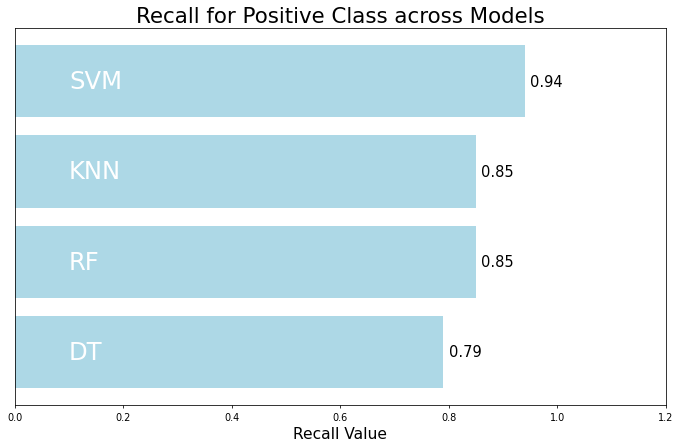

In [46]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='lightblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', color='black', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

__The SVM model demonstrates a commendable capability in recognizing potential heart patients. With a recall of 0.97 for class 1, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.__



<a id="Decile_chart_visualization"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Decile chart visualization</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [47]:
X_test_score = pd.DataFrame(best_svm.predict_proba(X_test)[:,1]).rename(columns = {0 : 'Prob'})
X_test_score

,Prob
0,0.462705
1,0.930330
2,0.351371
3,0.872345
4,0.978028
...,...
56,0.928747
57,0.101292
58,0.653975
59,0.121432


In [48]:
X_test_combine = X_test
X_test_combine['target'] = y_test

In [49]:
X_test_combine = pd.merge(X_test_combine,X_test_score,left_index=True, right_index=True, how='inner')


X_test_combine['Decile'] = pd.qcut(X_test_combine['Prob'],10,labels=False)

X_test_combine['Decile'] = X_test_combine['Decile'].max() - X_test_combine['Decile'] + 1
X_test_combine = X_test_combine.sort_values( by = 'Decile', ascending = False)


deciles_stats = X_test_combine.groupby('Decile').agg(
    total_obs =('target','count'),
    total_events = ('target','sum')).reset_index(drop=True)

deciles_stats[ 'cumulative_events']= deciles_stats['total_events'].cumsum(axis = 0)
deciles_stats['percentage_cumulative_events'] = (deciles_stats['cumulative_events'] / deciles_stats[ 'total_events'].sum())* 100

In [50]:
deciles_stats

,total_obs,total_events,cumulative_events,percentage_cumulative_events
0,2,2,2,15.384615
1,1,1,3,23.076923
2,1,1,4,30.769231
3,1,1,5,38.461538
4,1,1,6,46.153846
5,2,2,8,61.538462
6,1,1,9,69.230769
7,1,1,10,76.923077
8,1,1,11,84.615385
9,2,2,13,100.000000


In [51]:
X_test_combine

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Prob,Decile
40,51,140,308,142,1.5,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0.011406,10
19,69,140,239,151,1.8,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0.008942,10
13,64,110,211,144,1.8,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.045413,9
32,44,130,219,188,0.0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0.071976,8
38,65,155,269,148,0.8,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0.077173,7
24,40,140,199,178,1.4,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0.185332,6
14,58,150,283,162,1.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0.106900,6
2,41,130,204,172,1.4,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.351371,5
42,45,104,208,148,3.0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0.855588,4
30,41,105,198,168,0.0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0.865040,3


<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

__Because the test data is extremely limited, consisting of only 13 rows, it severely limits our ability to create meaningful visualizations like decile charts and extract reliable predicted probabilities. With such a small sample size, our analysis becomes less robust and our predictions may not accurately reflect real-world outcomes. In essence, the small test dataset hampers our ability to make confident assessments and predictions about the model's performance and the likelihood of certain events occurring. It's like trying to draw conclusions from a very tiny slice of the overall picture, which can lead to unreliable or misleading insights.__
 

<a id="Future_scope"></a>
# <p style="background-color:lightblue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | Future scope</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #b3cee5; font-size:120%; text-align:left">

`Certainly! Here's a more detailed explanation of how these steps contribute to creating accurate predictive models for heart disease:`

1. **Increase Test Data Size**: By collecting more data, we can increase the sample size, which leads to more reliable model predictions. A larger dataset provides a broader range of examples for the model to learn from, improving its ability to generalize to unseen data.

2. **Data Augmentation**: Data augmentation techniques involve generating additional training data by applying transformations or modifications to existing data points. This can help address imbalances in the dataset, improve model robustness, and enhance performance, especially when the original dataset is small.

3. **Cross-Validation**: Cross-validation is a technique used to assess the performance of a predictive model. By dividing the data into multiple subsets (folds), training the model on different combinations of these subsets, and evaluating its performance on the remaining data, we can obtain more reliable estimates of model performance and identify potential issues such as overfitting.

4. **Bootstrap Resampling**: Bootstrap resampling involves generating multiple pseudo-datasets by randomly sampling with replacement from the original dataset. This technique helps estimate the variability and uncertainty associated with model performance metrics, providing more reliable assessments of model performance, especially with limited data.

5. **Qualitative Evaluation**: In addition to quantitative metrics, qualitative evaluation methods such as reviewing individual predictions and conducting expert evaluations can provide valuable insights into the strengths and weaknesses of the predictive model. This human-in-the-loop approach can help identify errors or biases in the model and refine its performance.

6. **Alternative Metrics**: Traditional evaluation metrics like accuracy, precision, recall, and F1-score may not be suitable for assessing model performance with small sample sizes. Alternative metrics such as the area under the receiver operating characteristic (ROC) curve or precision-recall curve are less sensitive to imbalanced datasets and can provide a more comprehensive assessment of model performance.

7. **Model Regularization**: Regularization techniques such as L1/L2 regularization help prevent overfitting by penalizing overly complex models. Regularization encourages simpler models that generalize better to unseen data, improving overall model performance and reliability, particularly when working with limited data.

8. **Ensemble Methods**: Ensemble methods combine predictions from multiple individual models to produce a more accurate and robust final prediction. Techniques like bagging (bootstrap aggregating) and boosting (iterative improvement of weak learners) can help improve model performance, especially when individual models have limited predictive power.

By incorporating these strategies into the model development process, we can create more accurate and reliable predictive models for heart disease. Additionally, using Gain/Lift chart visualizations allows us to assess model performance and estimate the probability of heart disease based on the available variables, providing valuable insights for proactive interventions and risk management strategies.